# Figure A

`summarise()` has grouped output by 'time_point', 'ad_category'. You can
override using the `.groups` argument.


# A tibble: 27 × 5
# Groups:   time_point, ad_category [9]
   time_point ad_category Treatment_Information mean_CDR_SOB se_CDR_SOB
        <int> <fct>       <chr>                        <dbl>      <dbl>
 1          1 Slow        LY3314814-20mg                3.42     0.125 
 2         52 Slow        LY3314814-20mg                4.16     0.209 
 3        104 Slow        LY3314814-20mg                5.43     0.666 
 4          1 Slow        LY3314814-50mg                3.43     0.123 
 5         52 Slow        LY3314814-50mg                4.16     0.198 
 6        104 Slow        LY3314814-50mg                4.59     0.370 
 7          1 Slow        Placebo                       3.29     0.106 
 8         52 Slow        Placebo                       4.23     0.236 
 9        104 Slow        Placebo                       5.82     0.487 
10          1 Rapid       LY3314814-20mg                3.90     0.0849
# ℹ 17 more rows


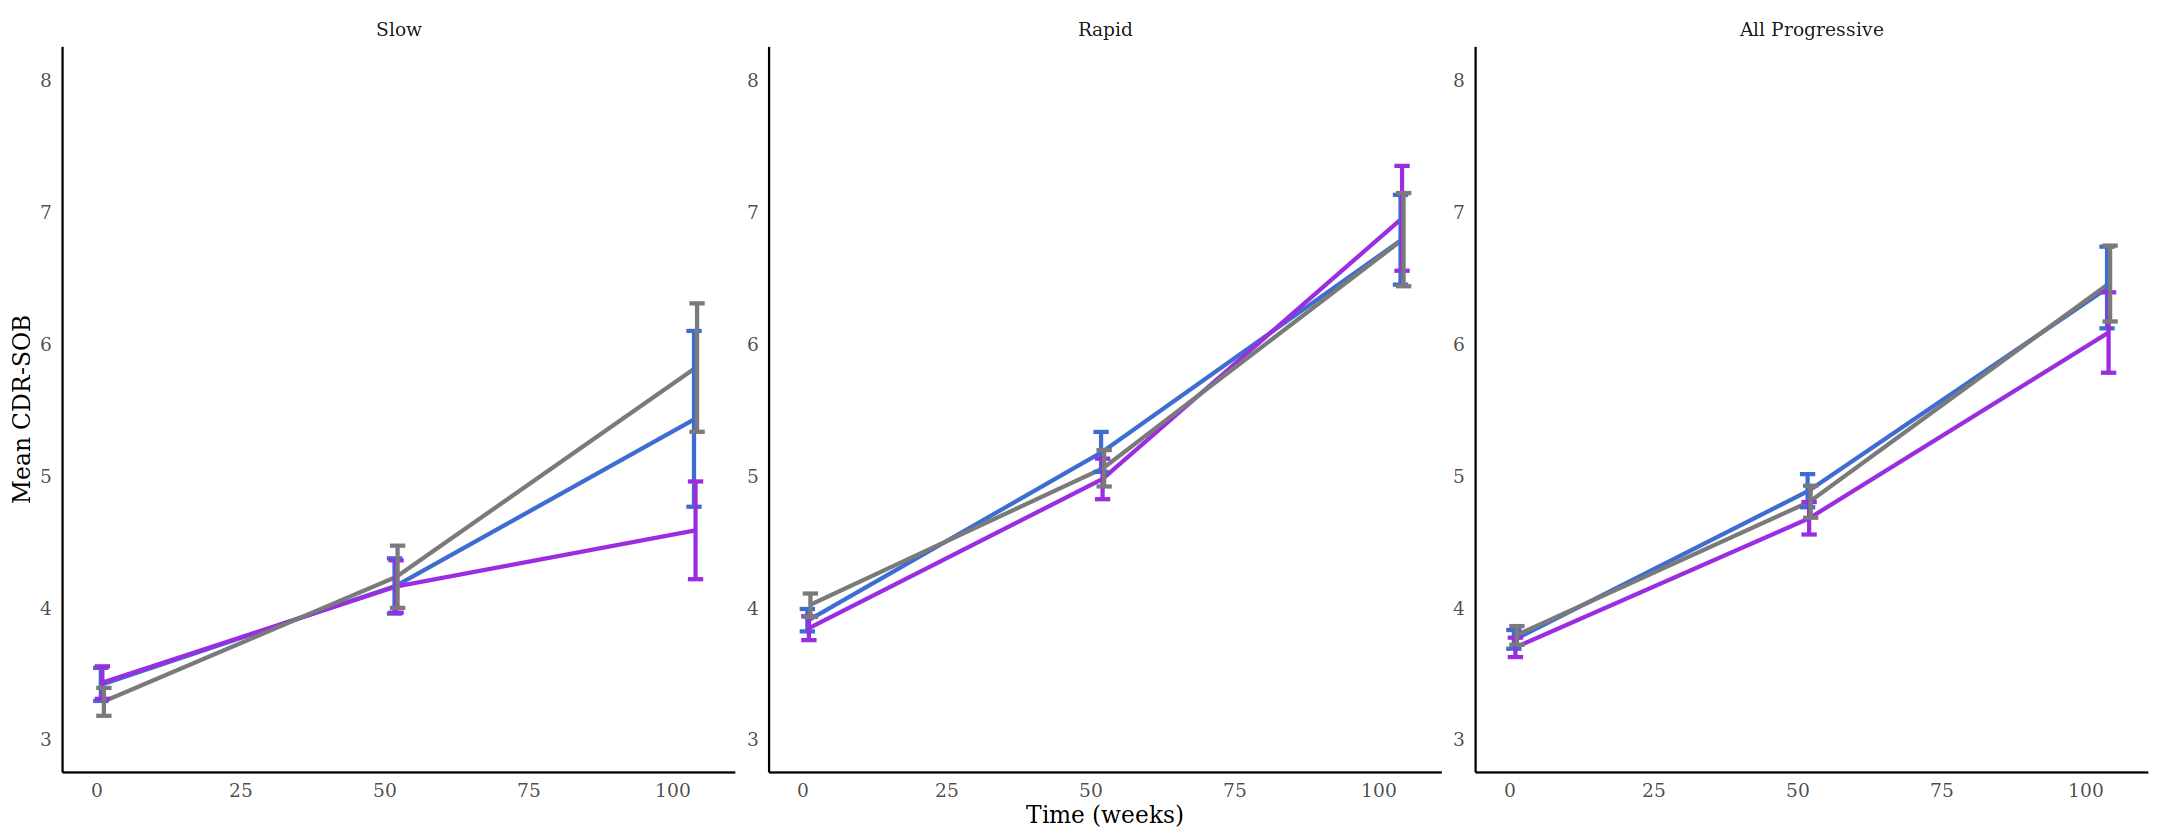

In [2]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(patchwork)

# Load Data
new_table_cdr_filtered <- read.csv("data/new_table_cdr_withCov.csv") #CDR

# CDR CHANGE
# Filter rows with time_point=1 and time_point=104
am_cdr_1 <- subset(new_table_cdr_filtered, time_point == 1)
am_cdr_104 <- subset(new_table_cdr_filtered, time_point == 104)

# Merge the two subsets based on the EID column
am_cdr_change <- merge(am_cdr_1, am_cdr_104, by = "EID", suffixes = c("_1", "_104"))

# Calculate the change in CDR_SOB
am_cdr_change$CDR_SOB_change <- am_cdr_change$CDR_SOB_104 - am_cdr_change$CDR_SOB_1

# Selecting specific columns
selected_columns <- c("EID", "Treatment_Information_1", "ad_category_1", "CDR_SOB_change")

# Subset the data with selected columns
am_cdr_change_subset <- am_cdr_change[, selected_columns]

# Plot CDR-SOB (main figure) and save figure and related table
# Assuming your CDR data is loaded into new_table_cdr_filtered
options(repr.plot.width = 18, repr.plot.height = 7)

# Combine "Slow" and "Rapid" into "All Progressive" and filter out "Stable" category
new_table_cdr_filtered_all <- new_table_cdr_filtered %>%
  filter(ad_category != "Stable") %>%
  mutate(ad_category = factor(ad_category, levels = c("Slow", "Rapid"))) %>%
  bind_rows(new_table_cdr_filtered %>%
              filter(ad_category != "Stable") %>%
              mutate(ad_category = "All Progressive")) %>%
  mutate(ad_category = factor(ad_category, levels = c("Slow", "Rapid", "All Progressive")))

# Plot for Study with three subplots for AD categories using facet_wrap
p <- ggplot(new_table_cdr_filtered_all, aes(x = time_point, y = CDR_SOB, group = Treatment_Information, color = Treatment_Information)) +
  stat_summary(fun = "mean", geom = "line", position = position_dodge(width = 0.2), size = 1.2) +
  stat_summary(fun.data = "mean_se", geom = "errorbar", position = position_dodge(width = 0.8), width = 8, size = 1.2) +
  facet_wrap(~ ad_category, scales = "free", nrow = 1) +  # Create separate plots for each ad_category
  labs(x = "Time (weeks)",  # Change x-axis label
       y = "Mean CDR-SOB") +
  theme_minimal(base_family = "serif", base_size = 14) +
  coord_cartesian(ylim = c(3, 8)) +
  scale_y_continuous(breaks = seq(3, 8, by = 1)) +  # Adding more tick marks on y-axis
  scale_color_manual(values = c("Placebo" = "#7a7a7aff",  # Medium dark gray for Placebo
                                "LY3314814-20mg" = "#3d6dd1ff", "LY3314814-50mg" = "#9b2de1ff",  # Different blue shades for Slow progression
                                "LY3314814-20mg" = "#3d6dd1ff", "LY3314814-50mg" = "#9b2de1ff")) +  # Adjust colors as needed
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        axis.line.x = element_line(color = "black"),
        axis.line.y = element_line(color = "black"),
        legend.position = "none")

# Print the plot
print(p)

# # Save the plot as EPS file
output_path_plot <- "figures/cdr_plot.eps"
ggsave(output_path_plot, plot = p, device = "eps", width = 14, height = 7, family = "serif")

# Calculate means and standard errors
summary_table <- new_table_cdr_filtered_all %>%
  group_by(time_point, ad_category, Treatment_Information) %>%
  summarise(
    mean_CDR_SOB = mean(CDR_SOB, na.rm = TRUE),
    se_CDR_SOB = sd(CDR_SOB, na.rm = TRUE) / sqrt(n())
  ) %>%
  arrange(ad_category, Treatment_Information, time_point)

# Save summary table as CSV
output_path_table <- "figures/CDR_summary_table.csv"
write.csv(summary_table, file = output_path_table, row.names = FALSE)

# Print the summary table
print(summary_table)


# Figure B 

CDR
  Ad_Category Placebo_Difference Placebo_SE X20mg_Difference  X20mg_SE
1        Slow           2.533938  0.4867404         2.013262 0.6664145
2       Rapid           2.771261  0.3532423         2.883725 0.3406049
3      Entire           2.657619  0.2029657         2.521315 0.2185000
  X50mg_Difference  X50mg_SE
1         1.154116 0.3703584
2         3.107167 0.3973194
3         2.215955 0.2150399
# A tibble: 3 × 7
  Ad_Category    Placebo_Mean Placebo_SE X20mg_Mean X20mg_SE X50mg_Mean X50mg_SE
  <chr>                 <dbl>      <dbl>      <dbl>    <dbl>      <dbl>    <dbl>
1 All Progressi…         2.66      0.203       2.52    0.218       2.22    0.215
2 Rapid                  2.77      0.353       2.88    0.341       3.11    0.397
3 Slow                   2.53      0.487       2.01    0.666       1.15    0.370


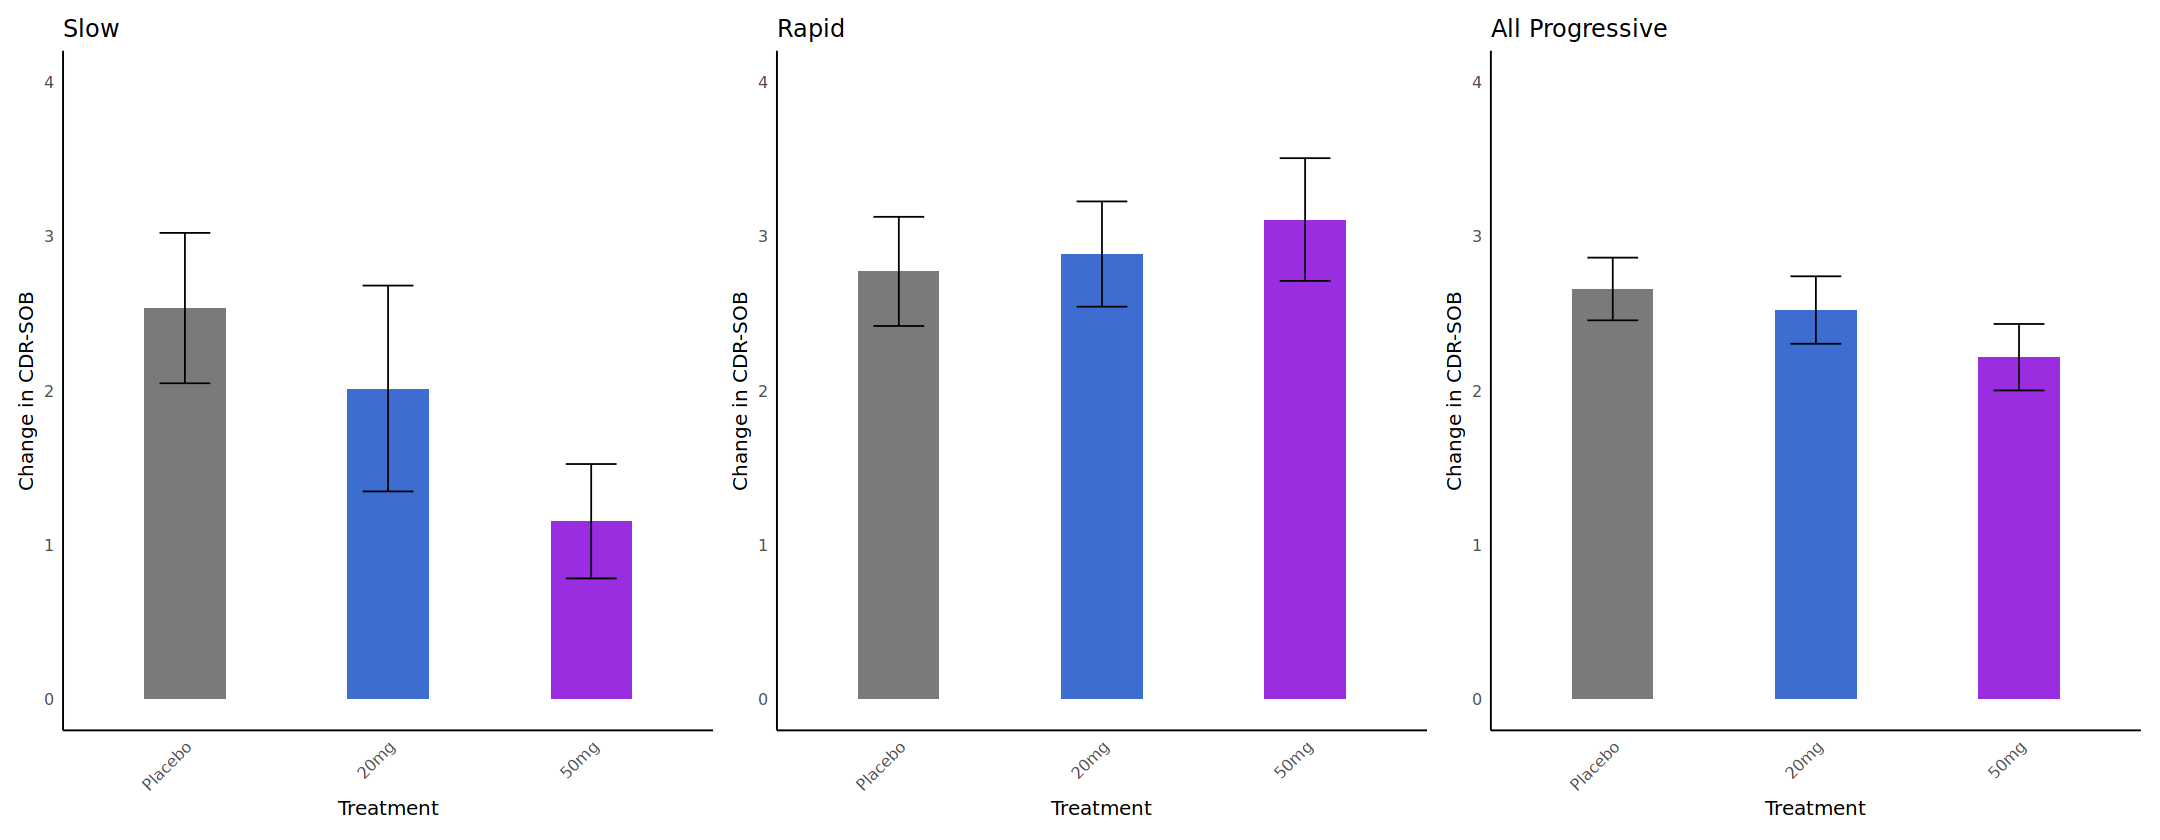

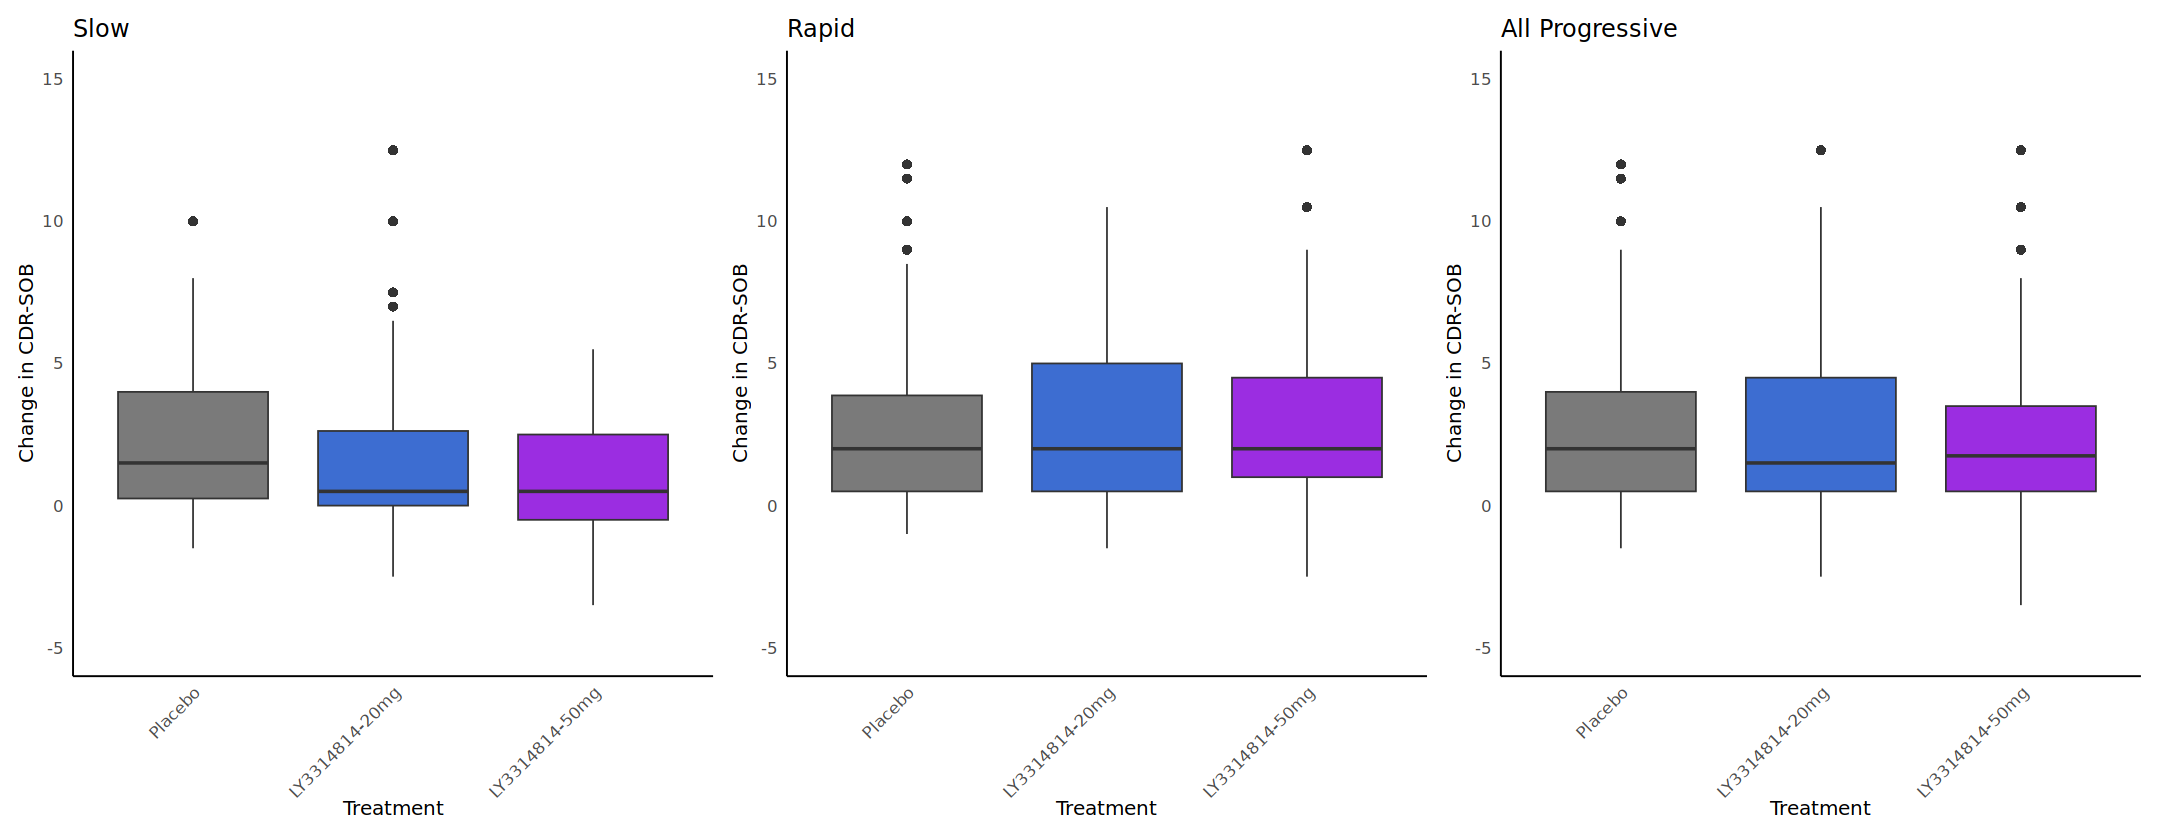

In [ ]:
# Load required packages
library(dplyr)
library(ggplot2)
library(patchwork)

# Ensure consistent plot size
options(repr.plot.width = 18, repr.plot.height = 7)

# Load Data
new_table_cdr_filtered <- read.csv("data/new_table_cdr_withCov.csv") #CDR

# CDR CHANGE
# Filter rows with time_point=1 and time_point=104
am_cdr_1 <- subset(new_table_cdr_filtered, time_point == 1)
am_cdr_104 <- subset(new_table_cdr_filtered, time_point == 104)

# Merge the two subsets based on the EID column
am_cdr_change <- merge(am_cdr_1, am_cdr_104, by = "EID", suffixes = c("_1", "_104"))

# Calculate the change in CDR_SOB
am_cdr_change$CDR_SOB_change <- am_cdr_change$CDR_SOB_104 - am_cdr_change$CDR_SOB_1

# Selecting specific columns
selected_columns <- c("EID", "Treatment_Information_1", "ad_category_1", "CDR_SOB_change")

# Subset the data with selected columns
am_cdr_change_subset <- am_cdr_change[, selected_columns]

# Data for change plots
# Combine "Slow" and "Rapid" into "All Progressive" and filter out "Stable" category
new_table_cdr_filtered_all <- new_table_cdr_filtered %>%
  filter(ad_category != "Stable") %>%
  mutate(ad_category = factor(ad_category, levels = c("Slow", "Rapid"))) %>%
  bind_rows(new_table_cdr_filtered %>%
              filter(ad_category != "Stable") %>%
              mutate(ad_category = "All Progressive")) %>%
  mutate(ad_category = factor(ad_category, levels = c("Slow", "Rapid", "All Progressive")))

new_data <- new_table_cdr_filtered_all

# Function to calculate mean values and differences
calculate_means_differences <- function(data, treatment_name) {
  data_treatment <- subset(new_data, Treatment_Information == treatment_name)
  
  mean_data_treatment <- aggregate(CDR_SOB ~ ad_category + time_point, data = data_treatment, FUN = mean)
  
  mean_rapid <- subset(mean_data_treatment, ad_category == "Rapid")
  mean_slow <- subset(mean_data_treatment, ad_category == "Slow")
  mean_entire <- aggregate(CDR_SOB ~ time_point, data = mean_data_treatment, FUN = mean)
  
  diff_slow_104_1 <- mean_slow[mean_slow$time_point == 104, "CDR_SOB"] - mean_slow[mean_slow$time_point == 1, "CDR_SOB"]
  diff_rapid_104_1 <- mean_rapid[mean_rapid$time_point == 104, "CDR_SOB"] - mean_rapid[mean_rapid$time_point == 1, "CDR_SOB"]
  diff_entire_104_1 <- mean_entire[mean_entire$time_point == 104, "CDR_SOB"] - mean_entire[mean_entire$time_point == 1, "CDR_SOB"]
  
  diff_data <- data.frame(Ad_Category = c("Slow", "Rapid", "Entire"),
                          Difference = c(diff_slow_104_1, diff_rapid_104_1, diff_entire_104_1))
  
  se_slow_104_1 <- data_treatment %>%
    filter(ad_category == "Slow" & time_point == 104) %>%
    summarise(SE = sd(as.numeric(CDR_SOB), na.rm = TRUE) / sqrt(n())) %>%
    pull(SE)
  
  se_rapid_104_1 <- data_treatment %>%
    filter(ad_category == "Rapid" & time_point == 104) %>%
    summarise(SE = sd(as.numeric(CDR_SOB), na.rm = TRUE) / sqrt(n())) %>%
    pull(SE)
  
  se_entire_104_1 <- data_treatment %>%
    filter(time_point == 104) %>%
    summarise(SE = sd(as.numeric(CDR_SOB), na.rm = TRUE) / sqrt(n())) %>%
    pull(SE)
  
  diff_data_se <- data.frame(Ad_Category = c("Slow", "Rapid", "Entire"),
                             Difference = c(diff_slow_104_1, diff_rapid_104_1, diff_entire_104_1),
                             SE = c(se_slow_104_1, se_rapid_104_1, se_entire_104_1))
  
  return(diff_data_se)
}

# Perform calculations for each treatment group
diff_data_se_50mg <- calculate_means_differences(new_data, "LY3314814-50mg")
diff_data_se_20mg <- calculate_means_differences(new_data, "LY3314814-20mg")
diff_data_se_placebo <- calculate_means_differences(new_data, "Placebo")

# Combine the data into a single data frame
combined_data <- data.frame(
  Ad_Category = diff_data_se_50mg$Ad_Category,
  Placebo_Difference = diff_data_se_placebo$Difference,
  Placebo_SE = diff_data_se_placebo$SE,
  `20mg_Difference` = diff_data_se_20mg$Difference,
  `20mg_SE` = diff_data_se_20mg$SE,
  `50mg_Difference` = diff_data_se_50mg$Difference,
  `50mg_SE` = diff_data_se_50mg$SE
)

cat("CDR\n")

# Print the combined data table
print(combined_data)


# Plot CDR-SOB change (main figure) and save figure and related table

# Provided data for CDR_SOB
combined_data_cdr <- data.frame(
  Ad_Category = c("Slow", "Rapid", "All Progressive"),
  Placebo_Difference = c(2.533938, 2.771261, 2.657619),
  Placebo_SE = c(0.4867404, 0.3532423, 0.2029657),
  X20mg_Difference = c(2.013262, 2.883725, 2.521315),
  X20mg_SE = c(0.6664145, 0.3406049, 0.2185000),
  X50mg_Difference = c(1.154116, 3.107167, 2.215955),
  X50mg_SE = c(0.3703584, 0.3973194, 0.2150399)
)

# Specify the output file path
output_path <- "figures/summary_CDR-SOB_change.csv"

# Write combined_data to CSV
write.csv(combined_data_cdr, file = output_path, row.names = FALSE)

# Function to create a plot for a specific Ad_Category
plot_category_cdr <- function(category) {
  data_to_plot <- combined_data_cdr[combined_data_cdr$Ad_Category == category,]
  plot_data <- data.frame(
    Treatment = factor(c("Placebo", "20mg", "50mg"), levels = c("Placebo", "20mg", "50mg")),
    Difference = c(data_to_plot$Placebo_Difference, data_to_plot$X20mg_Difference, data_to_plot$X50mg_Difference),
    SE = c(data_to_plot$Placebo_SE, data_to_plot$X20mg_SE, data_to_plot$X50mg_SE)
  )
  
  ggplot(plot_data, aes(x = Treatment, y = Difference, fill = Treatment)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.4) +
    geom_errorbar(aes(ymin = Difference - SE, ymax = Difference + SE),
                  position = position_dodge(width = 0.9), width = 0.25) +
    labs(title = category, x = "Treatment", y = "Change in CDR-SOB") +
    theme_minimal(base_size = 12) +
    coord_cartesian(ylim = c(0, 4)) +  # Adjusted ylim for CDR-SOB
    scale_fill_manual(values = c("Placebo" = "#7a7a7aff",  # Medium dark gray for Placebo
                                 "20mg" = "#3d6dd1ff",  # Different blue shades for Slow progression
                                 "50mg" = "#9b2de1ff")) + 
    theme(panel.grid.major = element_blank(),  # Remove major grid lines
          panel.grid.minor = element_blank(),  # Remove minor grid lines
          axis.line = element_line(color = "black"),  # Add axis lines
          axis.text.x = element_text(angle = 45, hjust = 1),
          legend.position = "none")  # Rotate x-axis labels
}

# Generate plots for each category
plot_slow_cdr <- plot_category_cdr("Slow")
plot_rapid_cdr <- plot_category_cdr("Rapid")
plot_entire_cdr <- plot_category_cdr("All Progressive")

# Arrange plots in a single row using patchwork
combined_plot_cdr <- plot_slow_cdr + plot_rapid_cdr + plot_entire_cdr + plot_layout(ncol = 3)

# # Save the plot as EPS file
output_path_plot <- "figures/change_bar_cdr_plot.eps"
ggsave(output_path_plot, plot = combined_plot_cdr, device = "eps", width = 14, height = 7, family = "serif")

print(combined_plot_cdr)

# Calculate means and standard errors
summary_table_cdr <- combined_data_cdr %>%
  group_by(Ad_Category) %>%
  summarise(
    Placebo_Mean = mean(Placebo_Difference),
    Placebo_SE = mean(Placebo_SE),
    X20mg_Mean = mean(X20mg_Difference),
    X20mg_SE = mean(X20mg_SE),
    X50mg_Mean = mean(X50mg_Difference),
    X50mg_SE = mean(X50mg_SE)
  )

# Print the summary table
print(summary_table_cdr)

plot_category_boxplot <- function(data, ad_category){
    # Remove duplicate rows
    df_unique <- unique(data)

    # Remove rows with NA values
    df_clean <- na.omit(df_unique)
    data_to_plot <- df_clean[df_clean$ad_category_1 == ad_category,]
    
    data_to_plot$Treatment_Information_1 <- factor(
      data_to_plot$Treatment_Information_1,
      levels = c("Placebo", "LY3314814-20mg", "LY3314814-50mg")
    )
  
    p <- ggplot(data_to_plot, aes(x = Treatment_Information_1, y = CDR_SOB_change, fill = Treatment_Information_1)) +
      geom_boxplot(outlier.shape = 16, outlier.size = 2.5) +
      labs(title = ad_category, x = "Treatment", y = "Change in CDR-SOB") +
      theme_minimal(base_size = 12) +
      scale_fill_manual(values = c("Placebo" = "#7a7a7aff", "LY3314814-20mg" = "#3d6dd1ff", "LY3314814-50mg" = "#9b2de1ff")) +
      
    # Add x-axis and y-axis labels
     theme_minimal(base_size = 12) +
#      coord_cartesian(ylim = c(-80, 20)) +
# Include tick marks for both axes
      scale_y_continuous(name = "Change in CDR-SOB", breaks = seq(-5, 20, by = 5), limits = c(-5, 15)) +
    
      theme(panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            axis.title.x = element_text(size = 12),
            axis.title.y = element_text(size = 12),
            axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
            axis.text.y = element_text(size = 10),
            axis.line = element_line(color = "black"),
            legend.position = "none")
    return(p)}

# Generate box plot with category parameter
# Create a duplicate of rows where ad_category_1 is "X" or "Y" and change it to "X+Y"
df_dup <- am_cdr_change_subset[am_cdr_change_subset$ad_category_1 %in% c("Slow", "Rapid"), ]
df_dup$ad_category_1 <- "All Progressive"

# Combine the original data frame with the duplicates for "X+Y"
df_combined <- rbind(am_cdr_change_subset, df_dup)

plot_slow_box <- plot_category_boxplot(df_combined, "Slow")
plot_rapid_box <- plot_category_boxplot(df_combined, "Rapid")
plot_entire_box <- plot_category_boxplot(df_combined, "All Progressive")

# Arrange plots in a single row using patchwork
combined_plot_box <- plot_slow_box + plot_rapid_box + plot_entire_box + plot_layout(ncol = 3)


# # Save the plot as EPS file
output_path_plot <- "figures/change_box_cdr_plot.eps"
ggsave(output_path_plot, plot = combined_plot_box, device = "eps", width = 14, height = 7, family = "serif")

# Print the combined box plots
print(combined_plot_box)